[90.93738004]


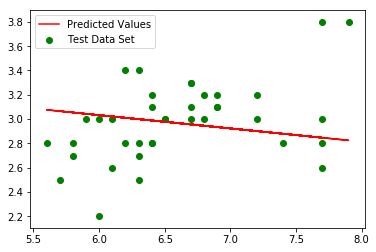

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import inv


class LinearTrainer:

    # Find the value of parameters in Linear Regression using normal equation method.
    def trains(self, x_data_train, y_data_train):

        # length of the train and test data sets.
        x_data_train = np.column_stack((np.ones((x_data_train.shape[0], 1), dtype=int), x_data_train))
        parameters = np.dot(inv(np.dot(np.transpose(x_data_train), x_data_train)),
                            np.dot(np.transpose(x_data_train), y_data_train))

        return parameters

    def classify(self, x_data_test, parameters):

        x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))

        return np.dot(x_data_test, parameters)

    def accuracy(self, y_data_test, y_pred_test):

        total_error = 0
        for i in range(0, len(y_data_test)):
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
        total_error = (total_error / len(y_data_test))
        accuracy = 1 - total_error
        return accuracy * 100

    def plotgraph(self, x_data_test, y_data_test, y_pred):

        plt.scatter(x_data_test, y_data_test, color='g', label='Test Data Set')
        plt.plot(x_data_test, y_pred, color='r', label='Predicted Values')
        plt.legend()
        plt.show()


def main():

    df = pd.read_csv('iris.csv')

    # Assign the split data into train and test variables.
    x_data_set = np.array(pd.DataFrame(df, columns=['sepal_length']))
    y_data_set = np.array(pd.DataFrame(df, columns=['sepal_width']))

    x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_data_set, y_data_set, test_size=0.25, shuffle=False)

    l_t = LinearTrainer()
    parameters = l_t.trains(x_data_train, y_data_train)
    y_prediction = l_t.classify(x_data_test, parameters)
    accuracy = l_t.accuracy(y_data_test, y_prediction)
    print(accuracy)
    l_t.plotgraph(x_data_test, y_data_test, y_prediction)


if __name__ == '__main__':
    main()
